##
- HofKonditorei = home made patisserie
- Trockenprodukte = dry product (ex. honey, jam, ...)
- Non-food ex. Glass, PET
- Erlebnis = Aventure (kids gardening)
- Getranke = Drinks 
- Obst = fruit
- HofChuchi = Home made meal
- Frischprodukte = fresh product 
- HofBäckerei = home made bakery
- Gemüse = vegetables



In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
df_J = pd.read_csv('data/POS-data_Juckerhof.csv', sep=";", encoding='latin1')
df_B = pd.read_csv('data/POS-data_Baechlihof.csv', sep=";", encoding='latin1')

In [3]:
oneweek = 604800


def last_week_price(df,x):
    where = (df['timestamp'] > x - 2.*oneweek ) & (df['timestamp'] < x - oneweek)
    return df['price'][where].sum()

def last_month_price(df,x):
    where = (df['wday'] == x[1])  & (df['timestamp'] > x[0] - 5*oneweek) & (df['timestamp'] < x[0] - 4*oneweek)
    # print(where.shape)
    return df['price'][where].sum()

#df_J['last_week_price'] = df_J['timestamp'].apply(lambda x: last_week_price(df_J,x) )
#df_B['last_week_price'] = df_B['timestamp'].apply(lambda x: last_week_price(df_B,x) )


In [4]:
# concatenate both datasets
res = pd.concat([df_J, df_B])

# addind dummy variables for time 
res['wday'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_wday) 
res['month'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_mon) 
res['hour'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_hour if time.gmtime(x).tm_min <= 30 else time.gmtime(x).tm_hour + 1)
res['mday'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_mday) 
res['year'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_year)
res['yday'] = res['timestamp'].apply(lambda x: time.gmtime(x).tm_yday)


res['ratio_vat'] = res['vat_pos']/res['price']

/home/musella/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


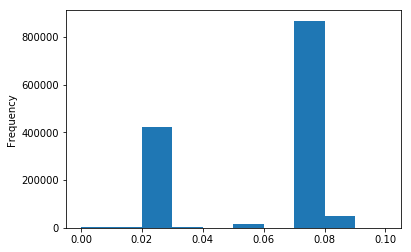

In [5]:
import matplotlib.pyplot as plt

res['ratio_vat'].plot.hist()
plt.show()

In [6]:
#res['ratio_vat']
res['is_resto'] = res['ratio_vat'] > 0.05
# res['is_resto']

split_by_vat = False

In [7]:
df_m = pd.read_csv('data/weather-data.csv',sep=';')

# df_m.col

#  df_m['wday'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_wday) 
df_m['month'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_mon) 
df_m['hour'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_hour if time.gmtime(x).tm_min <= 30 else time.gmtime(x).tm_hour + 1)
# df_m['min'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_min)

df_m['mday'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_mday) 
df_m['year'] = df_m['date'].apply(lambda x: time.gmtime(x).tm_year)



In [8]:
# df_m['min']

In [9]:
def plot_date(df):
    df.mday.plot.hist(bins=31)
    plt.figure()
    df.hour.plot.hist(bins=24)
    plt.figure()
    if "wday" in df:
        df.wday.plot.hist(bins=7)
        plt.figure()
    df.year.plot.hist(bins=7)
    plt.figure()
    print('unique mday',df.mday.unique())
    print('unique hour',df.hour.unique())
    if "wday" in df:
        print('unique wday',df.wday.unique())
    

unique mday [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
unique hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


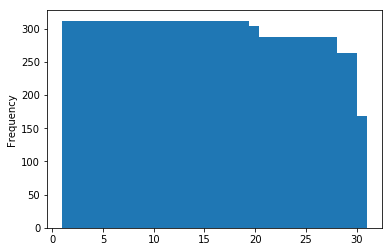

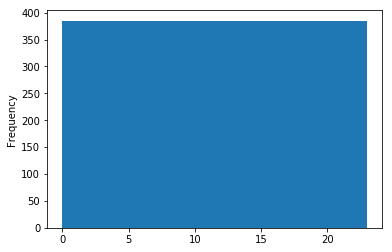

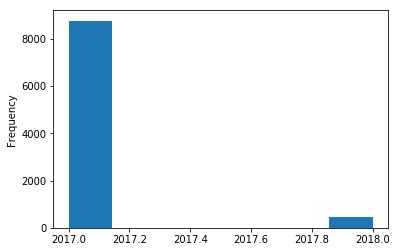

In [10]:
plot_date(df_m)

unique mday [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
unique hour [ 8  9 10 11 12 13 14 15 16 17 18 23 19 24  0 20  7 21 22  1  2]
unique wday [2 3 4 5 6 0 1]


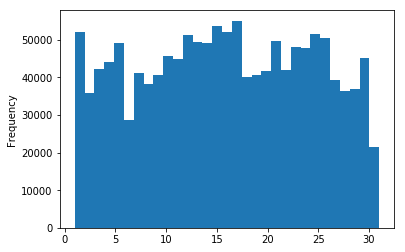

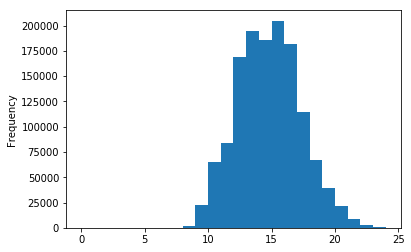

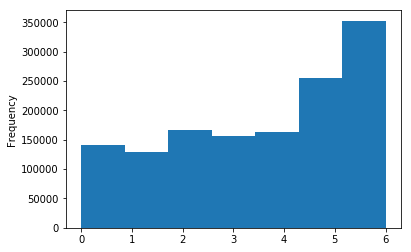

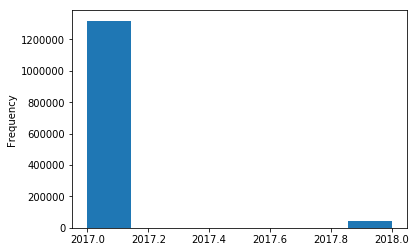

In [11]:
plot_date(res)

In [12]:
res.article.unique()

array(['Mineral Personal', 'Eier gefärbt / gekocht', 'Brötli vom Hof',
       ..., 'Rafzer Knoblauch mit Kräuter 200g',
       'Loyalty Aufladung 1288607233979363',
       'Loyalty Aufladung 1288607235900566'], dtype=object)

In [13]:
res_w = pd.merge(res,df_m,on=['month','hour','mday','year'],how='left')

In [14]:
# res_w['shop'] = pd.get_dummies(res_w['shop'])['Juckerhof Bächlihof']

In [15]:
index = ['shop','is_resto',#'article_group0',
         'month','hour','mday','year',
         ]

if not split_by_vat:
    index.pop(1)
    
grouby = []
for col in index:
    res_w[col+"_idx"] = res_w[col]
    grouby.append(col+"_idx")

In [16]:
gb = res_w.groupby(grouby)

In [17]:
# # gb['temperature'].isna().sum()
# missing_meteo = res_w[res_w[ 'temperature' ].isna()]
# missing_meteo.plot.scatter( 'month' , 'year')


In [18]:
# df_m.plot.scatter('month','yeardf_m
df_m.columns

Index(['date', 'temperature', 'precipitation', 'snowfraction',
       'sealevelpressure', 'winddirection', 'windspeed', 'relativehumidity',
       'sunshinetime', 'totalcloudcover', 'lowclouds', 'midclouds',
       'highclouds', 'month', 'hour', 'mday', 'year'],
      dtype='object')

In [33]:
# df_m[ (df_m.year == 2018) & (df_m.month == 1) ].mday.hist()

features = ['temperature', 'precipitation', 'snowfraction',
       'sealevelpressure', 'winddirection', 'windspeed', 'relativehumidity',
       'sunshinetime', 'totalcloudcover', 'lowclouds', 'midclouds',
       'highclouds', 'wday', 'month', 'hour', 'mday', 'year','timestamp', ] + index

if not split_by_vat:
    features.append('is_resto')

In [34]:
df_features = gb[features].mean()

In [35]:
df_features['price'] = gb['price'].sum()
df_features['count'] = gb['count'].sum()


In [36]:
df_features['n_transactions'] = gb['transaction_id'].unique().apply(lambda x: len(x))

In [37]:
# res_w['shop'].unique()

In [38]:
df_features.index.levels[0]

Index(['Juckerhof Bächlihof', 'Juckerhof Seegräben'], dtype='object', name='shop_idx')

In [39]:
shop1 = df_features.loc['Juckerhof Bächlihof']
shop2 = df_features.loc['Juckerhof Seegräben']


if split_by_vat:
    shop1_resto = shop1.loc[True]
    shop1_shop = shop1.loc[False]

    shop2_resto = shop2.loc[True]
    shop2_shop = shop2.loc[False]


In [40]:
# # oneweek = 604800

if split_by_vat:
    shop1_resto_month_avg = shop1_resto[['timestamp','wday']].apply( lambda x: last_month_price(shop1_resto,x), raw=True, axis=1   )
    shop1_resto_week_avg = shop1_resto['timestamp'].apply( lambda x: last_week_price(shop1_resto,x)   )

    shop1_shop_month_avg = shop1_resto[['timestamp','wday']].apply( lambda x: last_month_price(shop1_shop,x), raw=True, axis=1   )
    shop1_shop_week_avg = shop1_resto['timestamp'].apply( lambda x: last_week_price(shop1_shop,x)   )

else:
    shop1_month_avg = shop1[['timestamp','wday']].apply( lambda x: last_month_price(shop1,x), raw=True, axis=1   )
    shop1_week_avg = shop1['timestamp'].apply( lambda x: last_week_price(shop1,x)   )
    

In [41]:
# # oneweek = 604800

if split_by_vat:
    shop2_resto_month_avg = shop2_resto[['timestamp','wday']].apply( lambda x: last_month_price(shop2_resto,x), raw=True, axis=1   )
    shop2_resto_week_avg = shop2_resto['timestamp'].apply( lambda x: last_week_price(shop2_resto,x)   )

    shop2_shop_month_avg = shop2_resto[['timestamp','wday']].apply( lambda x: last_month_price(shop2_shop,x), raw=True, axis=1   )
    shop2_shop_week_avg = shop2_resto['timestamp'].apply( lambda x: last_week_price(shop2_shop,x)   )
    
else:
    shop2_month_avg = shop2[['timestamp','wday']].apply( lambda x: last_month_price(shop2,x), raw=True, axis=1   )
    shop2_week_avg = shop2['timestamp'].apply( lambda x: last_week_price(shop2,x)   )

    

In [42]:
if split_by_vat:
    shop1_resto['last_week_price'] = shop1_resto_week_avg
    shop1_resto['last_month_price'] = shop1_resto_week_avg 

    shop1_shop['last_week_price'] = shop1_shop_week_avg
    shop1_shop['last_month_price'] = shop1_shop_week_avg 
    
else:
    shop1['last_week_price'] = shop1_week_avg
    shop1['last_month_price'] = shop1_week_avg 
    



/home/musella/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/musella/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [43]:
if split_by_vat:
    shop2_resto['last_week_price'] = shop2_resto_week_avg
    shop2_resto['last_month_price'] = shop2_resto_week_avg 

    shop2_shop['last_week_price'] = shop2_shop_week_avg
    shop2_shop['last_month_price'] = shop2_shop_week_avg 

else:
    shop2['last_week_price'] = shop2_week_avg
    shop2['last_month_price'] = shop2_week_avg 
    

/home/musella/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/musella/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [44]:
# df_features2 = np.concatenate([shop1,shop2])

In [45]:
if split_by_vat:
    shop1_resto['is_resto'] = True
    shop2_resto['is_resto'] = True

    shop1_shop['is_resto'] = False
    shop2_shop['is_resto'] = False


    shop1_resto.to_csv('shop1_resto_v3.csv')
    shop2_resto.to_csv('shop2_resto_v3.csv')


    shop1_shop.to_csv('shop1_shop_v3.csv')
    shop2_shop.to_csv('shop2_shop_v3.csv')

else:
    shop1.to_csv('shop1_v3.csv')
    shop2.to_csv('shop2_v3.csv')
    
    

In [ ]:
# pd.concat( [shop1_resto,shop1_shop] ).to_csv("shop1_v2.csv")
# pd.concat( [shop2_resto,shop2_shop] ).to_csv("shop2_v2.csv")